In [1]:
#Project - Healthcare
#Predict whether a patient has diabetes.

#To predict whether a patient has diabetes based on certain medical predictor variables.

#Data Retrieval
#The dataset includes several predictors (pregnancies such as BMI, insulin level, age, and so on) and one target variable

#The Patient data can be downloaded

#The fields are

#Pregnancies
#Glucose
#BloodPressure
#SkinThickness
#Insulin
#BMI
#DiabetesPedigree
#Age


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("diabetes-data.csv")
df

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df.tail()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0

In [6]:
df.shape

(768, 9)

In [7]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [8]:
df.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [9]:
df.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [10]:
df2=df.copy(deep=True)

In [11]:
df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']]=df2[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)

In [12]:
print(df2.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


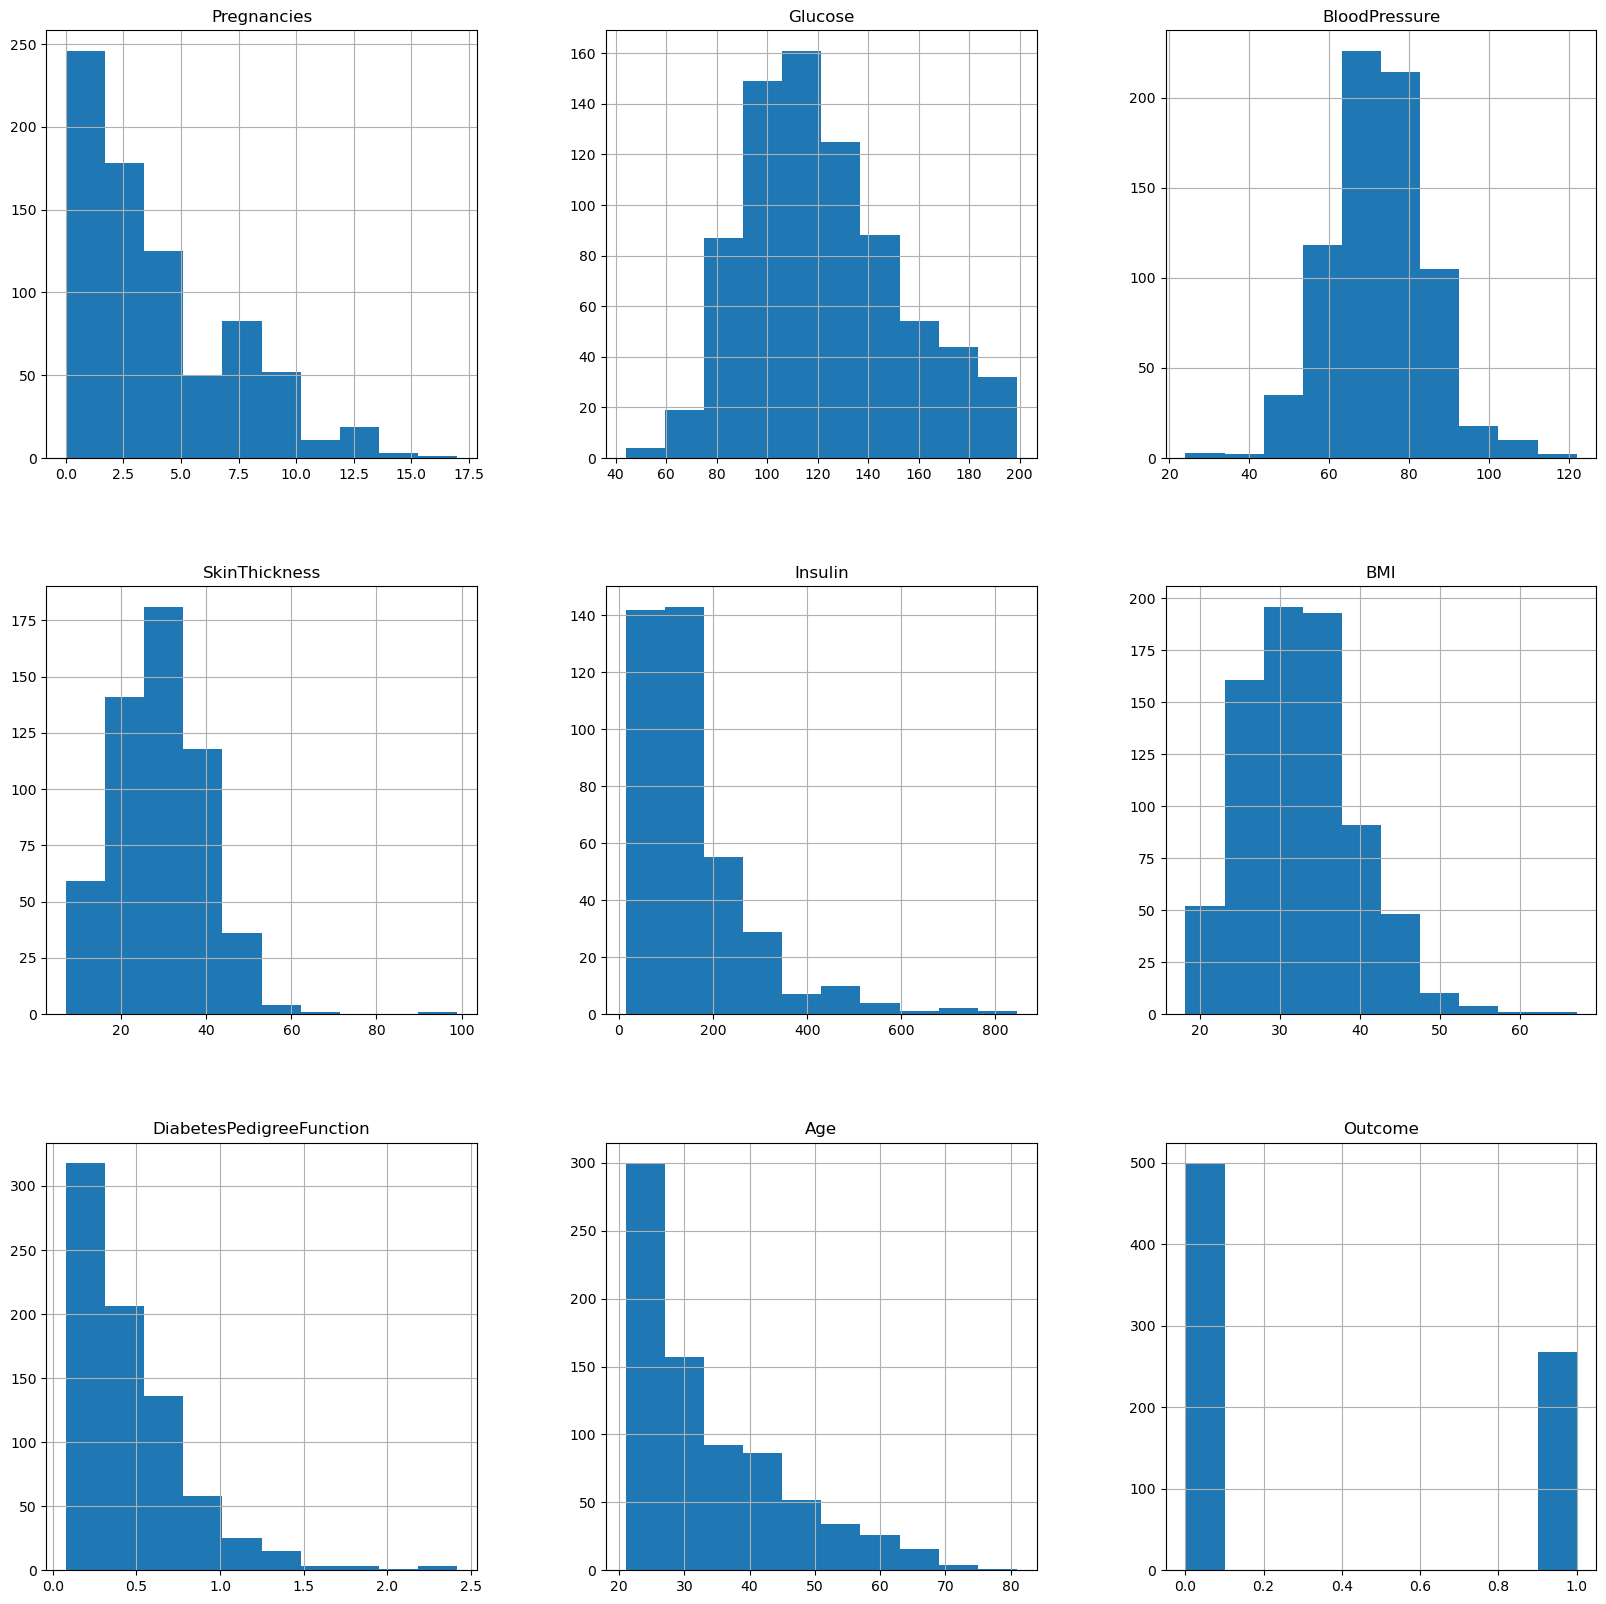

In [13]:
hplot=df2.hist(figsize=(20,20))

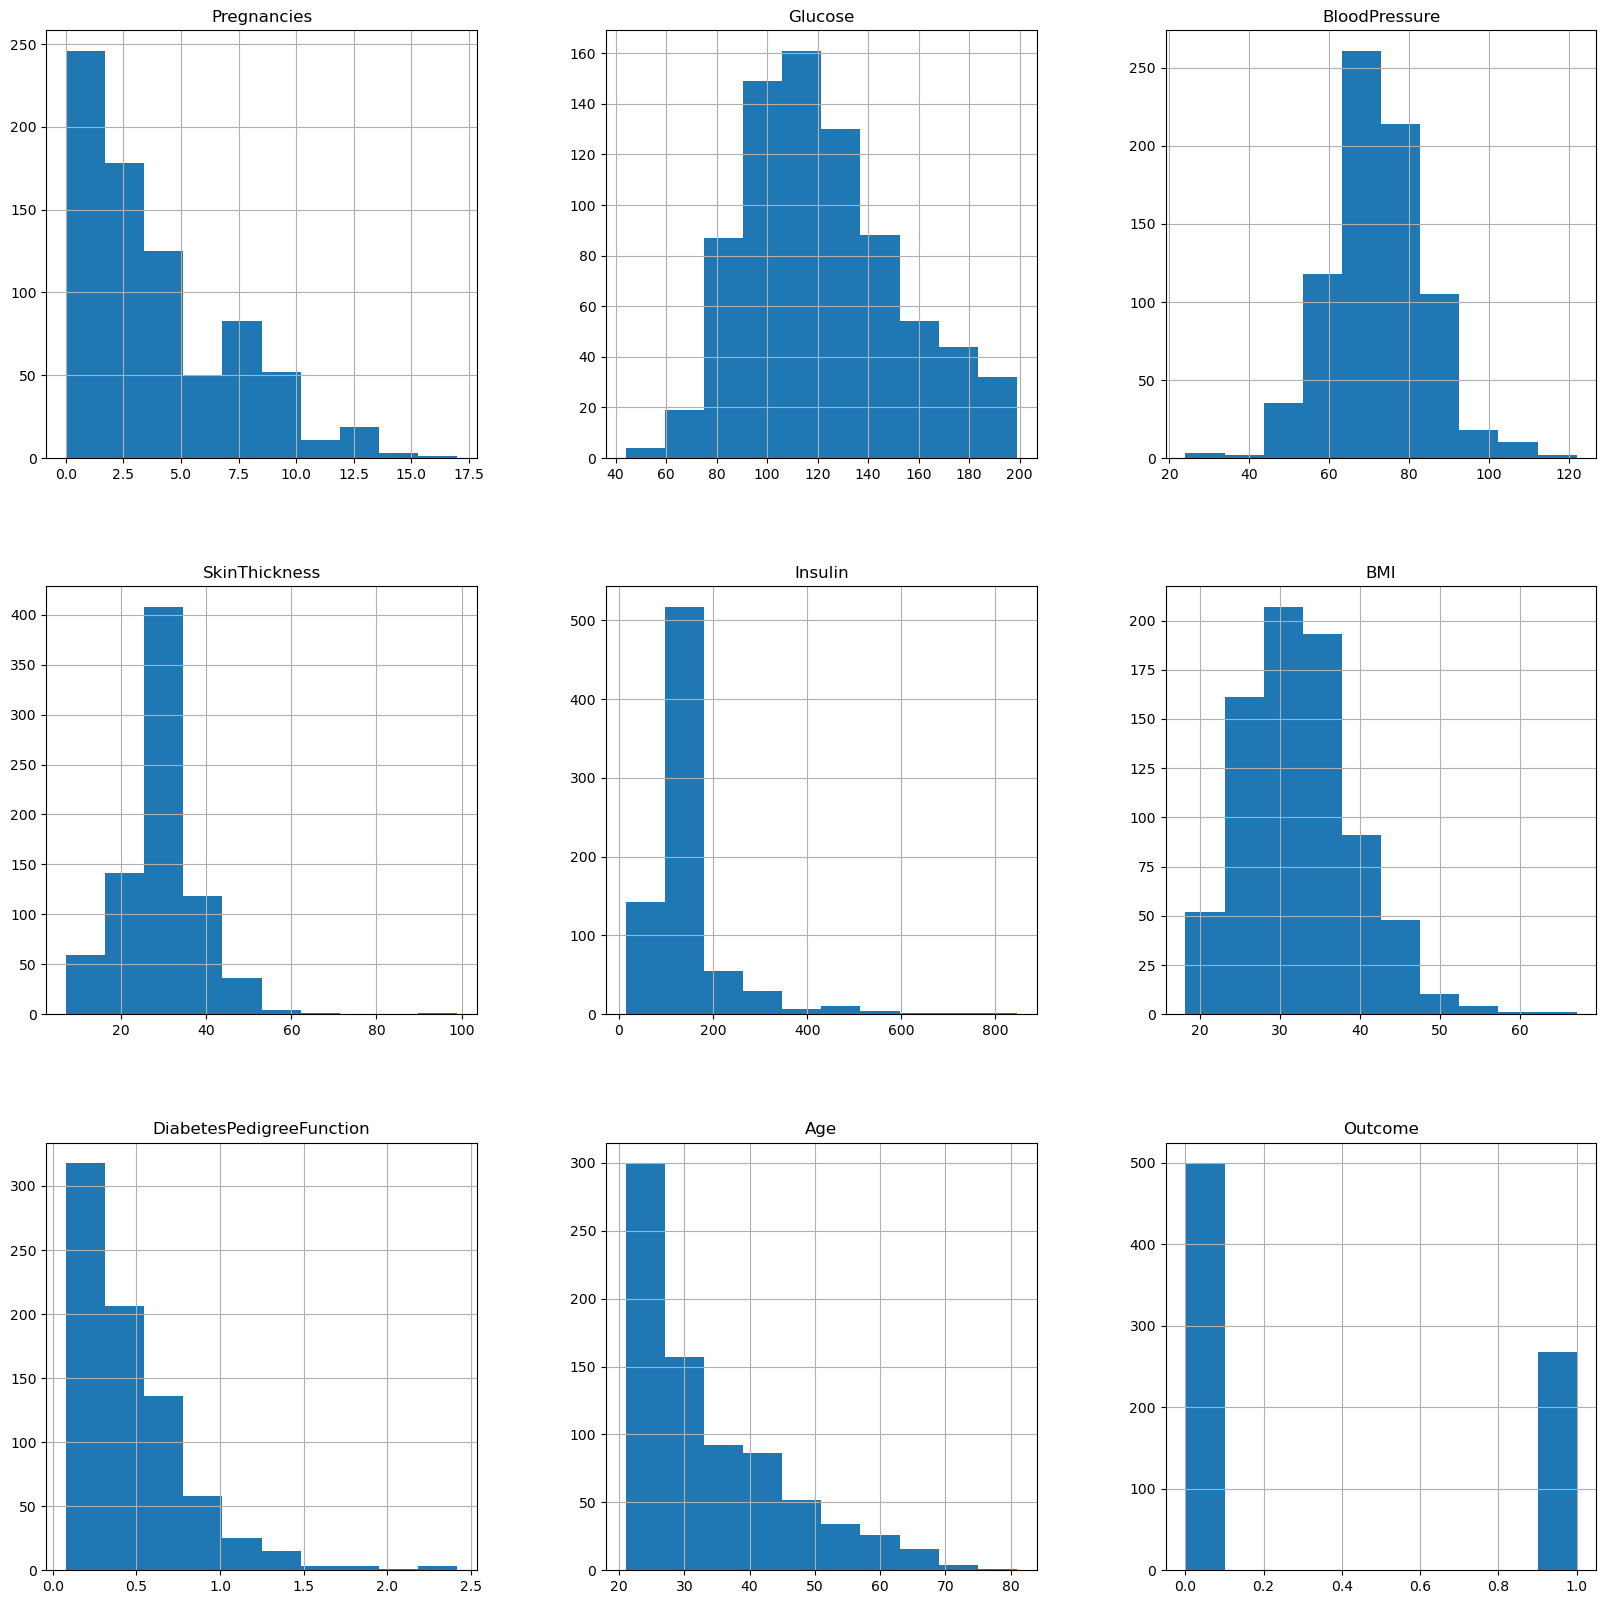

In [14]:
df2['Glucose'].fillna(df2['Glucose'].mean(), inplace = True)
df2['BloodPressure'].fillna(df2['BloodPressure'].mean(), inplace = True)
df2['SkinThickness'].fillna(df2['SkinThickness'].median(), inplace = True)
df2['Insulin'].fillna(df2['Insulin'].median(), inplace = True)
df2['BMI'].fillna(df2['BMI'].median(), inplace = True)

hplot = df2.hist(figsize = (20,20))

In [15]:
# eda
df2.shape

(768, 9)

0    500
1    268
Name: Outcome, dtype: int64
AxesSubplot(0.125,0.11;0.775x0.77)


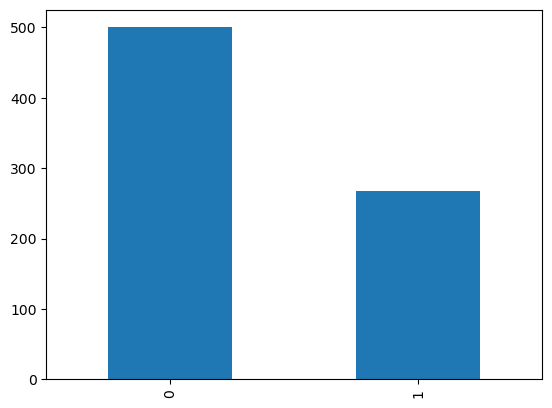

In [16]:
print(df2.Outcome.value_counts())
print(df2.Outcome.value_counts().plot(kind="bar"))
plt.show()

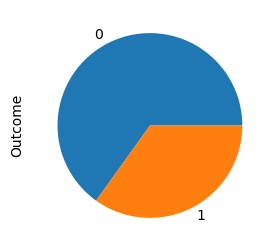

In [17]:
plt.figure(figsize=(3,3))
df2.Outcome.value_counts().plot(kind="pie")
plt.show()

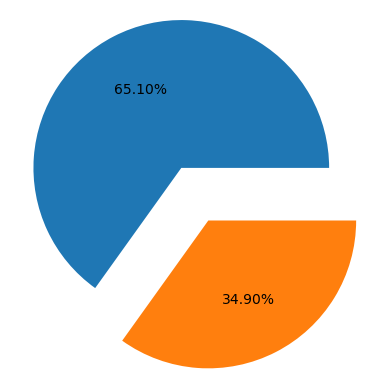

In [18]:
plt.pie(df2.Outcome.value_counts(),autopct='%.2f%%',explode=[0.2,0.2])
plt.show()

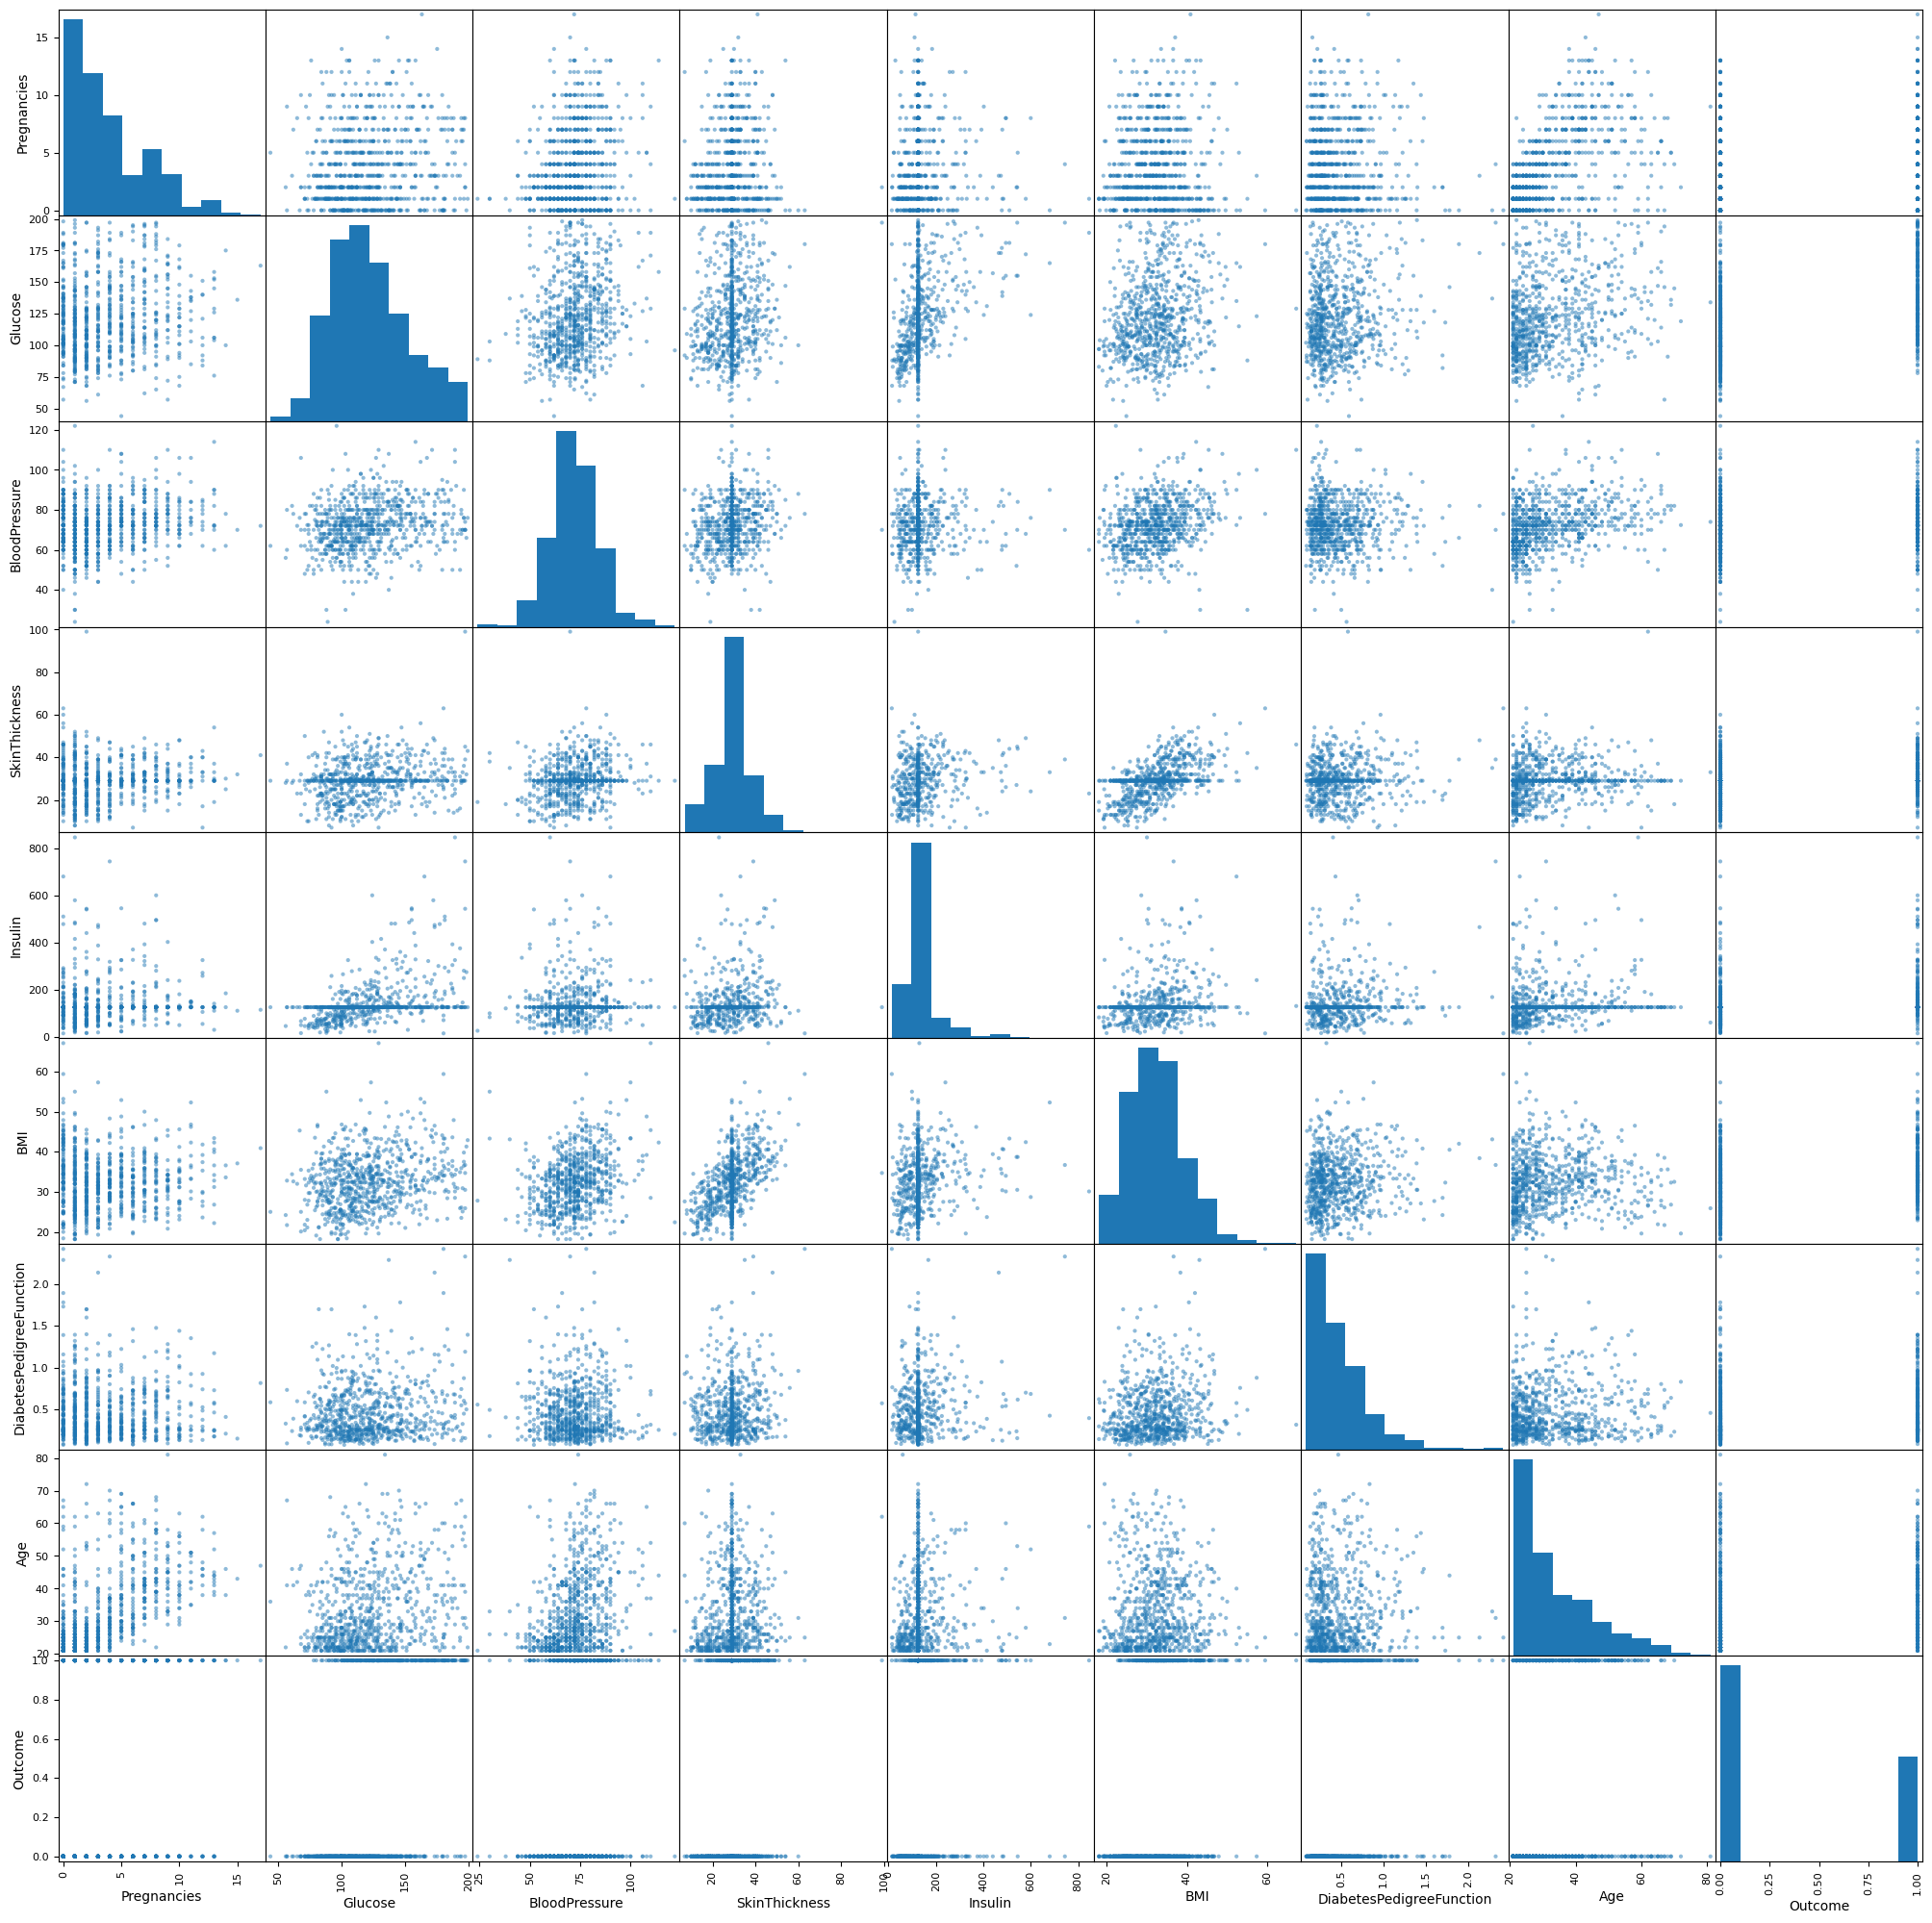

In [19]:
from pandas.plotting import scatter_matrix
p=scatter_matrix(df2,figsize=(25, 25))

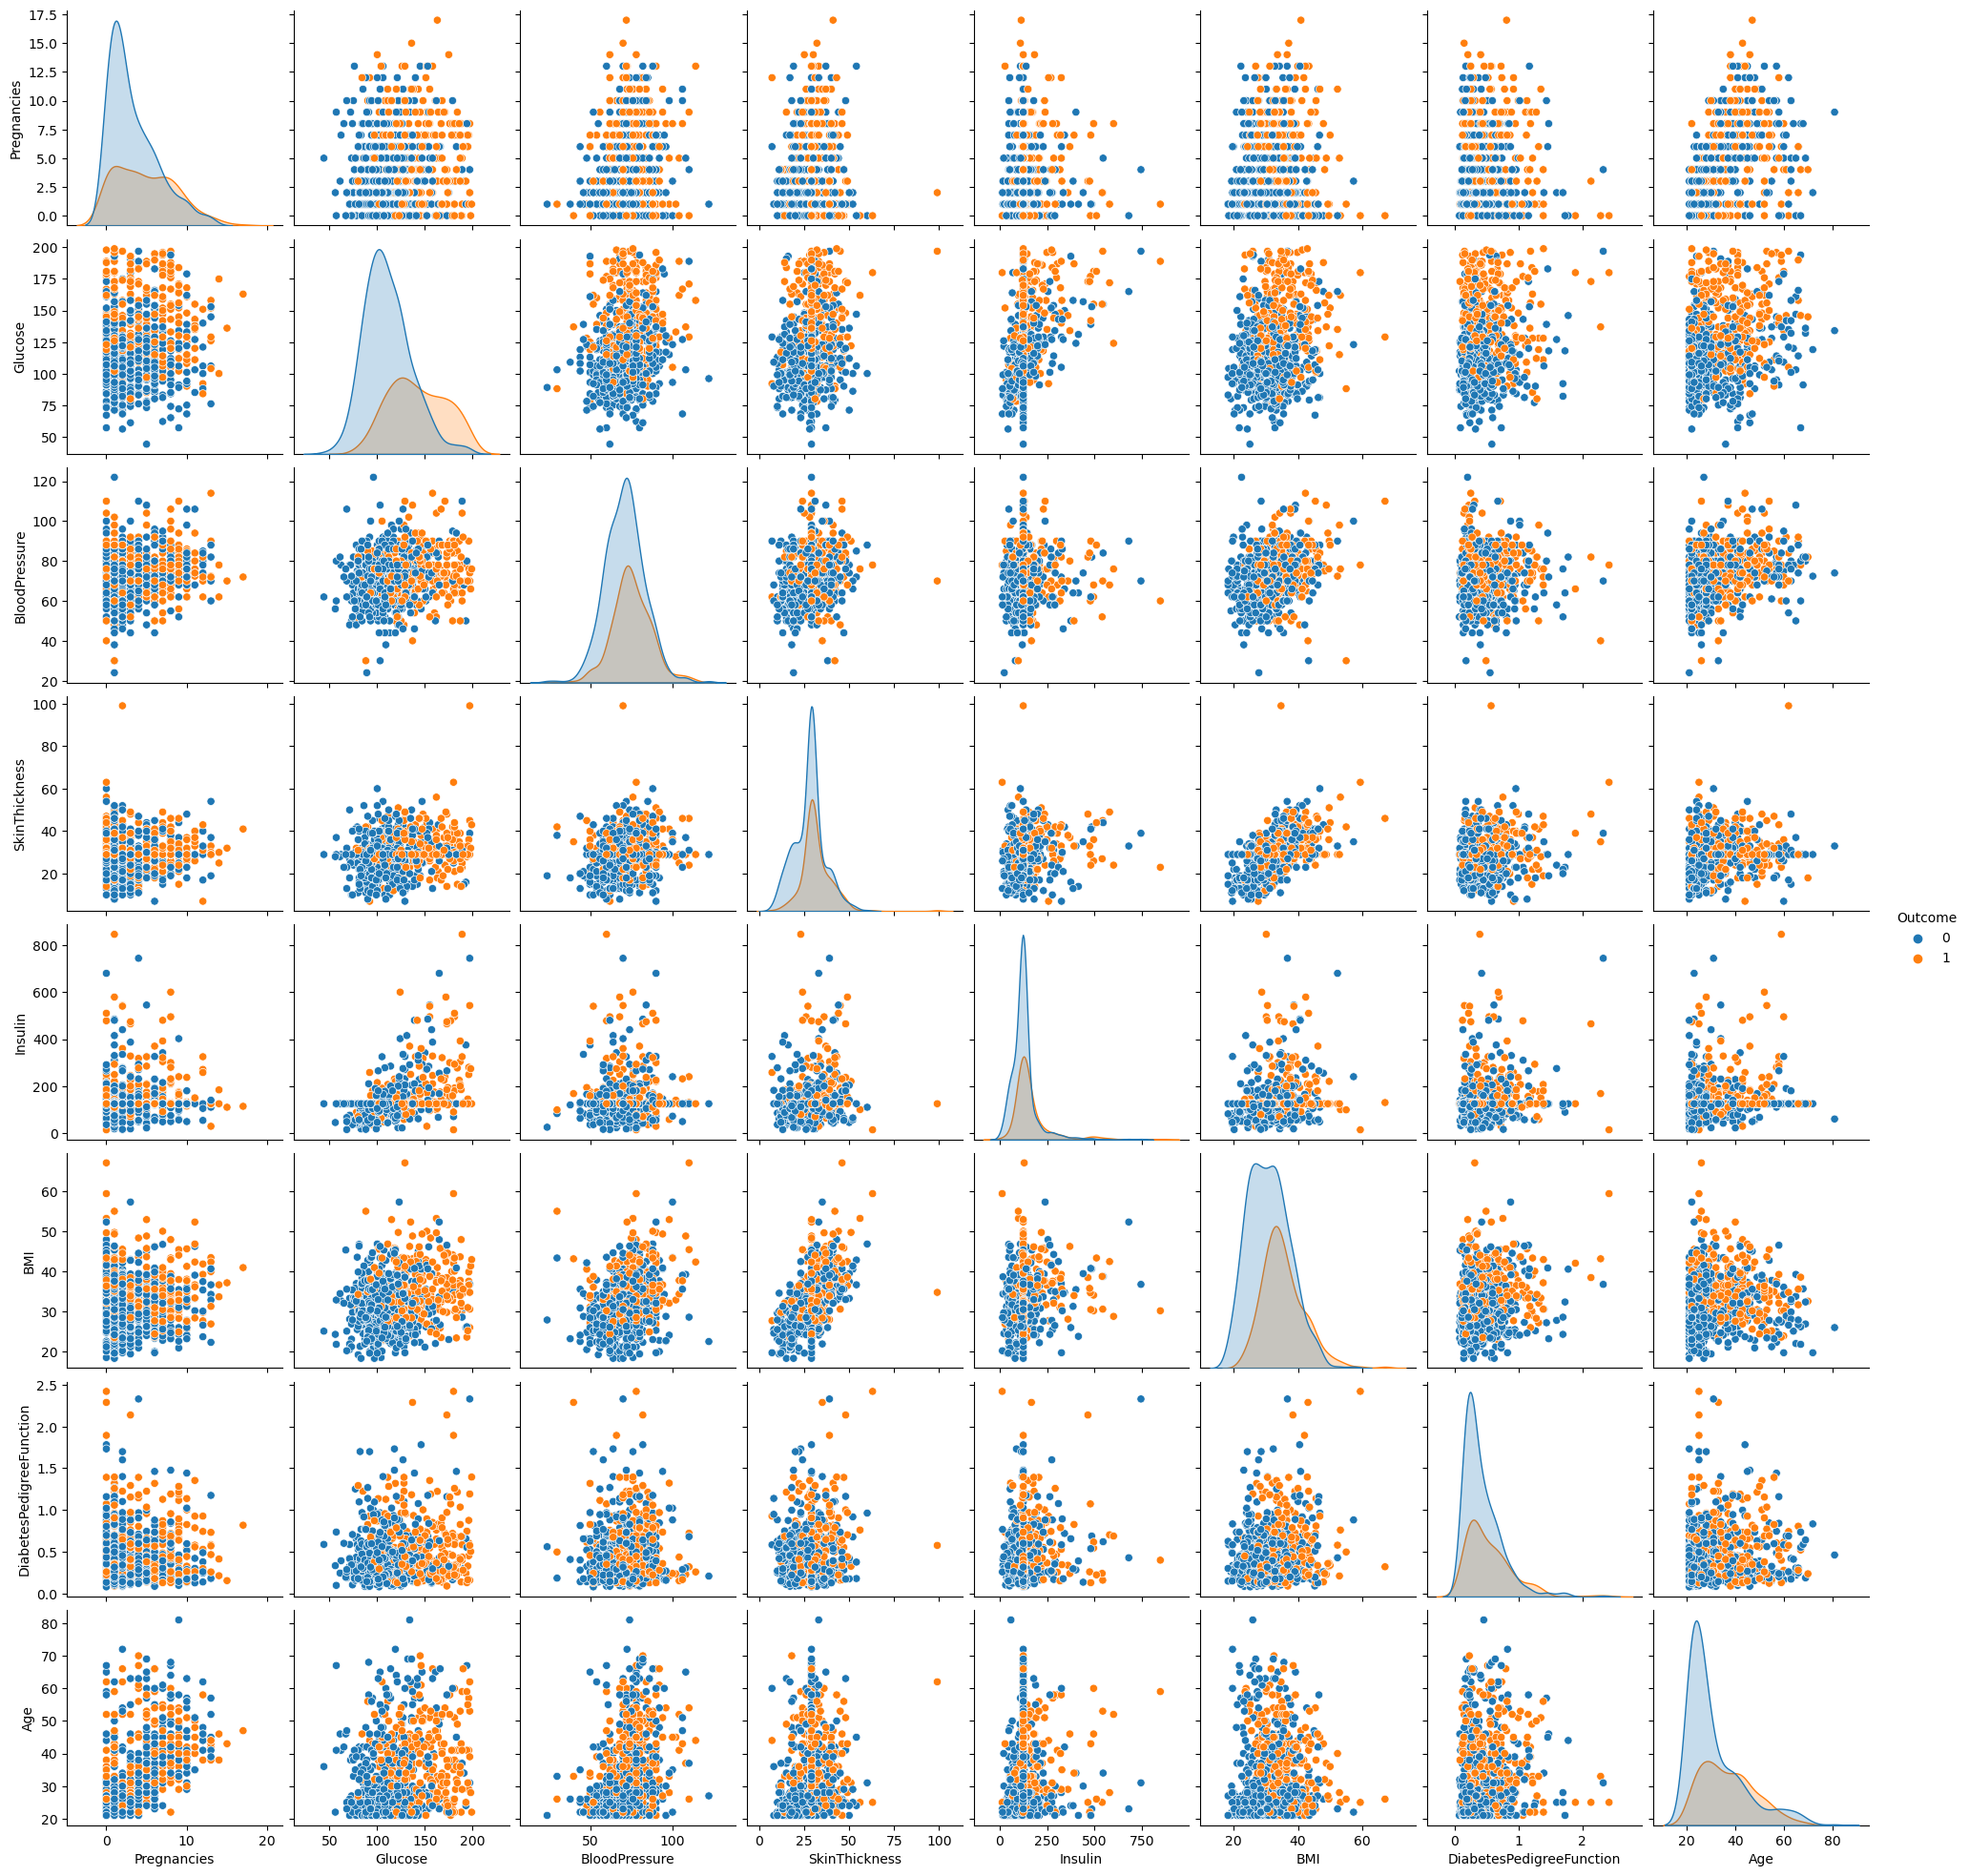

In [20]:
s=sns.pairplot(df2,hue='Outcome')

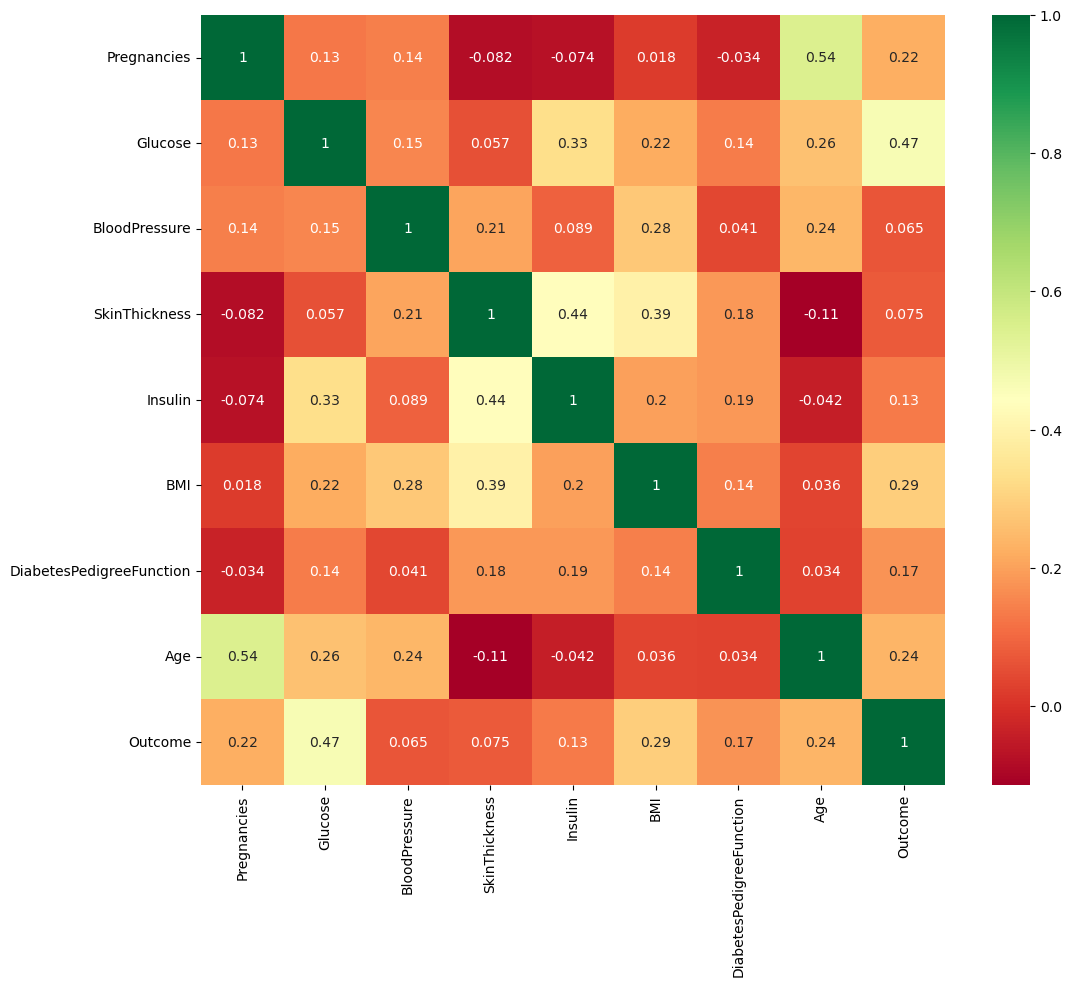

In [21]:
plt.figure(figsize=(12,10))
p=sns.heatmap(df.corr(),annot=True,cmap='RdYlGn') # annot view the value 
# cmap combination of a colour 
plt.show()



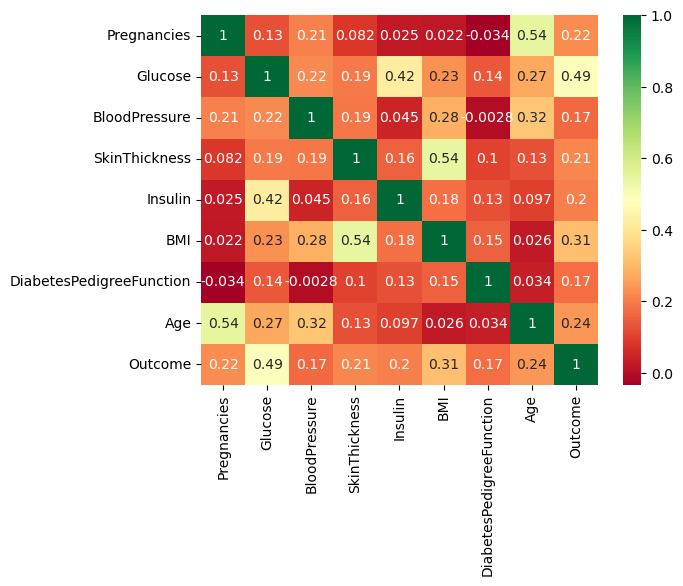

In [22]:
p=sns.heatmap(df2.corr(),annot=True,cmap='RdYlGn')

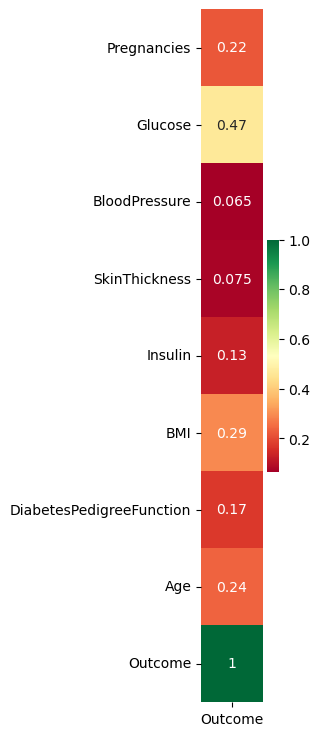

In [23]:

plt.figure(figsize=(1,9))
p=sns.heatmap(df.corr()[['Outcome']],annot=True,cmap='RdYlGn') # annot view the value 
# cmap combination of a colour 
plt.show()

           

In [24]:
# scaling is an important  step the preprocessed amy contain varibales with different value ranges
#quantities such dollar kilogram and sales volume the learning models are mpre efficient if the attributes have the same scales 
# two important methods of scaling are 1=normalization 2=standariation
# standardization = xi- meu/ segma 
# normalization = x-min(x)/max(x)-min(x)

In [25]:
from sklearn.preprocessing import StandardScaler

x=df.drop(['Outcome'],axis=1)
y=df.Outcome


In [ ]:
print(x.)

In [60]:
#from sklearn.preprocessing import StandardScaler
# initialize the standar scaler
# fit data to data scaler 
#scale_X = StandardScaler()
# 

#X = scale_X.fit_transform(df2.drop(["Outcome"],axis = 1),)
#X = pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])

#X.head()


sc =StandardScaler()
X=sc.fit_transform(x)
X = pd.DataFrame(X,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age'])
X

Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.639947  0.848324       0.149641       0.907270 -0.692891  0.204013   
1      -0.844885 -1.123396      -0.160546       0.530902 -0.692891 -0.684422   
2       1.233880  1.943724      -0.263941      -1.288212 -0.692891 -1.103255   
3      -0.844885 -0.998208      -0.160546       0.154533  0.123302 -0.494043   
4      -1.141852  0.504055      -1.504687       0.907270  0.765836  1.409746   
..           ...       ...            ...            ...       ...       ...   
763     1.827813 -0.622642       0.356432       1.722735  0.870031  0.115169   
764    -0.547919  0.034598       0.046245       0.405445 -0.692891  0.610154   
765     0.342981  0.003301       0.149641       0.154533  0.279594 -0.735190   
766    -0.844885  0.159787      -0.470732      -1.288212 -0.692891 -0.240205   
767    -0.844885 -0.873019       0.046245       0.656358 -0.692891 -0.202129   

     DiabetesPedigreeFunction       Age  
0                    0.468492  1.425995  
1                   -0.365061 -0.190672  
2                    0.604397 -0.105584  
3                   -0.920763 -1.041549  
4                    5.484909 -0.020496  
..                        ...       ...  
763                 -0.908682  2.532136  
764                 -0.398282 -0.531023  
765                 -0.685193 -0.275760  
766                 -0.371101  1.170732  
767                 -0.473785 -0.871374  

[768 rows x 8 columns]

In [55]:
print(x.Glucose.mean())
print(x.Glucose.std())
print(x.Glucose.max())
print(x.Glucose.min())

120.89453125
31.97261819513622
199
0


In [56]:
(148-44)/(199-44)

0.6709677419354839

In [57]:
(148-120.89)/31.97

0.8479824835783547

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
y=df2.Outcome

In [30]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=1/3,random_state=42,stratify=y)

In [31]:
x_train,x_test,y_train,y_test.shape

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 657    -0.844885 -0.027996       0.563223       1.722735  1.043689  0.876685   
 462     1.233880 -1.467665       0.046245       1.220910 -0.267429  0.419775   
 171     0.639947  0.410164       0.046245       0.154533  0.435886  0.432467   
 210    -0.547919 -1.248585      -0.470732       0.091805 -0.692891 -0.544811   
 147    -0.547919 -0.466156      -0.263941       0.907270  0.340374 -0.189437   
 ..           ...       ...            ...            ...       ...       ...   
 113     0.046014 -1.405071      -0.367337      -1.288212 -0.692891  0.254780   
 556    -0.844885 -0.747831       0.046245       1.220910 -0.692891  0.775149   
 254     2.421746 -0.904316      -0.367337      -0.849116  1.547297 -0.557503   
 647    -1.141852  1.818535      -0.987710       0.969998  0.687690  0.737074   
 107     0.046014  0.723135      -0.574128       0.468173  0.522715 -0.316356   
 
      DiabetesPedigreeFunc

In [32]:
len(x_train)

512

In [33]:
len(x_test)

256

In [34]:
from sklearn.neighbors import KNeighborsClassifier 
testing_score = []
training_score = []

for i in range(1,15):

    knn = KNeighborsClassifier(i)
    knn.fit(x_train,y_train)
    
    training_score.append(knn.score(x_train,y_train))
    testing_score.append(knn.score(x_test,y_test))

In [35]:
training_score

[1.0,
 0.837890625,
 0.857421875,
 0.8046875,
 0.82421875,
 0.791015625,
 0.80859375,
 0.791015625,
 0.802734375,
 0.77734375,
 0.783203125,
 0.783203125,
 0.7890625,
 0.779296875]

In [36]:
testing_score

[0.71875,
 0.6953125,
 0.6875,
 0.71875,
 0.73046875,
 0.734375,
 0.76171875,
 0.75390625,
 0.765625,
 0.765625,
 0.76953125,
 0.75390625,
 0.7578125,
 0.734375]

In [37]:
max_training_score = max(training_score)
train_scores_ind = [i for i, v in enumerate(training_score) if v == max_training_score]
print('Max training score {} % and k = {}'.format(max_training_score*100,list(map(lambda x: x+1, train_scores_ind))))



Max training score 100.0 % and k = [1]


In [38]:
max_testing_score = max(testing_score)
test_scores_ind = [i for i, v in enumerate(testing_score) if v == max_testing_score]
print('Max testing score {} % and k = {}'.format(max_testing_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max testing score 76.953125 % and k = [11]


C:\Users\91840\Downloads\Telegram Desktop\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\91840\Downloads\Telegram Desktop\anacoda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


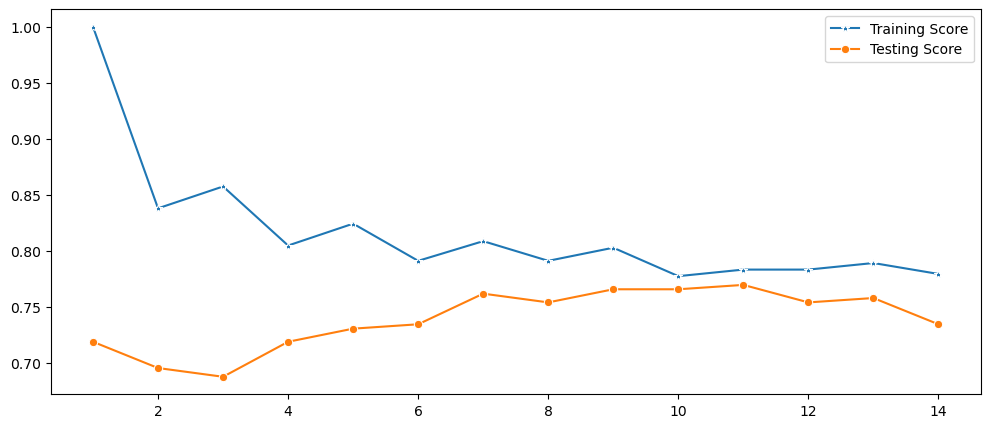

In [39]:
plt.figure(figsize=(12,5))
pplot = sns.lineplot(range(1,15),training_score,marker='*',label='Training Score')
pplot = sns.lineplot(range(1,15),testing_score,marker='o',label='Testing Score')

In [40]:
knn = KNeighborsClassifier(11)

knn.fit(x_train,y_train)
knn.score(x_test,y_test)


0.76953125

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
knn = KNeighborsClassifier(11)

In [43]:
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=11)

In [44]:
from sklearn.metrics import  accuracy_score

In [45]:
yhat=knn.predict(x_test)

In [46]:
yhat

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [47]:
accuracy_score(y_test,yhat)

0.76953125

In [48]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,yhat)

array([[147,  20],
       [ 39,  50]], dtype=int64)

<AxesSubplot:>

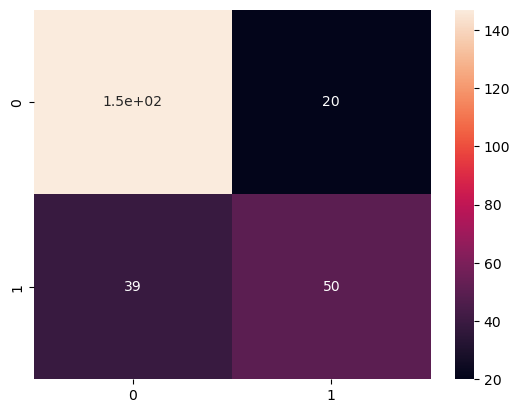

In [61]:
sns.heatmap(confusion_matrix(y_test,yhat),annot=True)

In [63]:
confusion_matrix(y_test,yhat).transpose()

array([[147,  39],
       [ 20,  50]], dtype=int64)